Figures from Chapter 1 of Poldrack et al., Handbook of fMRI Data Analysis

In [7]:
from Bio import Entrez
import numpy
from wand.image import Image as WImage
import os
from fmrihandbook.utils.config import Config
import matplotlib.pyplot as plt
%matplotlib inline

config=Config()


__Figure 1.1:__ 

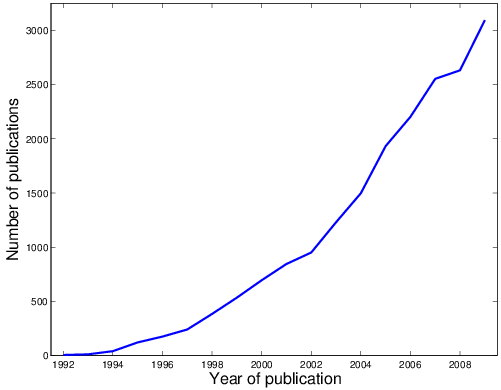

In [8]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_1_1.pdf'))

In [9]:
def get_pubmed_query_results(query,entrez_email=config.email,retmax=20000):
    print 'searching for',query
    Entrez.email=entrez_email
    handle=Entrez.esearch(db='pubmed',term=query,retmax=retmax)
    record = Entrez.read(handle)
    return record

In [10]:

if not config.email:
    raise Exception('you must first set your email address for your Entrez account')

nhits=[]
years=[]
for year in range(1990,2015):
    query='("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND %d[DP]'%year
    results=get_pubmed_query_results(query)
    nhits.append(len(results['IdList']))
    years.append(year)
    

Exception: you must first set your email address for your Entrez account

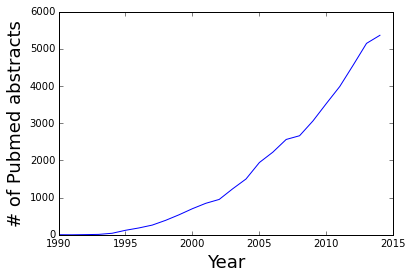

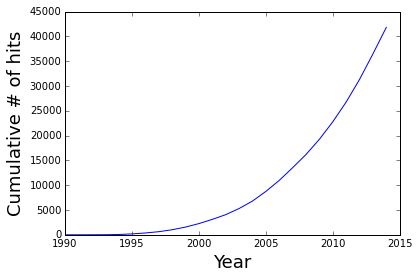

In [11]:
plt.plot(years,nhits)
plt.xlabel('Year',fontsize=18)
plt.ylabel('# of Pubmed abstracts',fontsize=18)

plt.savefig('hits_by_year.pdf')
plt.savefig(os.path.join(config.figuredir,'Figure_1_1.svg'),format='svg',dpi=1200)

plt.figure()
cumhits=numpy.zeros(len(years))
for i in range(len(years)):
    cumhits[i]=numpy.sum(nhits[:(i+1)])
plt.plot(years,cumhits)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Cumulative # of hits',fontsize=18)
#plt.savefig('cumhits_by_year.pdf')


__Figure 1.2:__ 

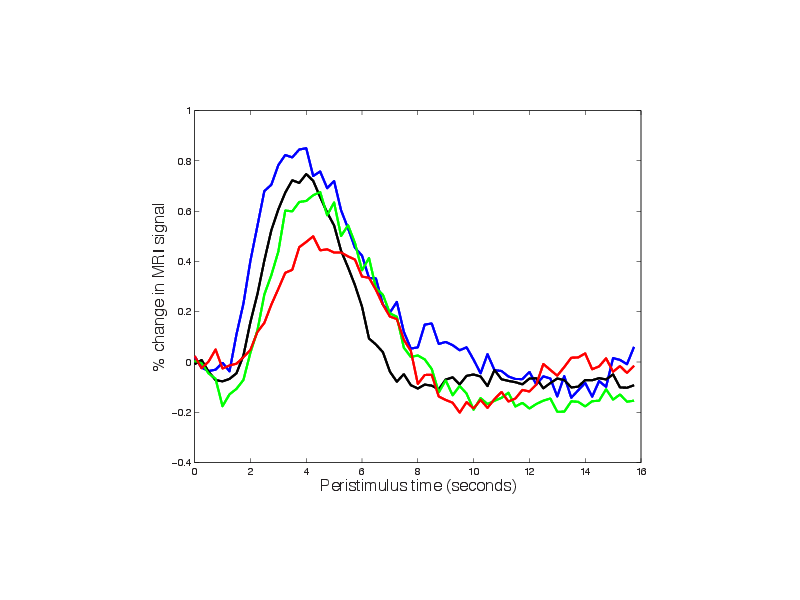

In [13]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_1_2.pdf'))

(64,)


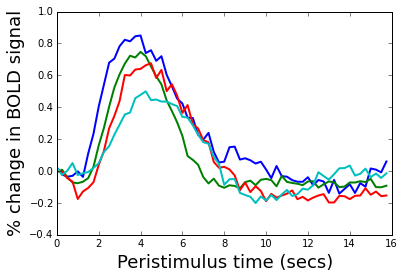

In [24]:
import scipy.io
data=scipy.io.loadmat('forRuss.mat')
hrfdata=data['allmnresps']
hrfdata.shape

timepoints=numpy.arange(0,16,0.25)
print timepoints.shape
plt.plot(timepoints,hrfdata[:,1,:]*100,linewidth=2)
plt.ylabel('% change in BOLD signal',fontsize=18)
plt.xlabel('Peristimulus time (secs)',fontsize=18)

plt.savefig(os.path.join(config.figuredir,'Figure_1_2.svg'),format='svg',dpi=1200)


__Figure 1.3:__ 

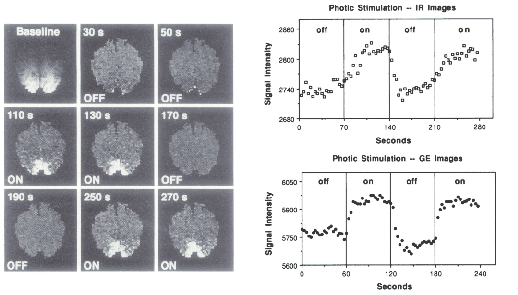

In [14]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_1_3.pdf'))

__Figure 1.4:__ 

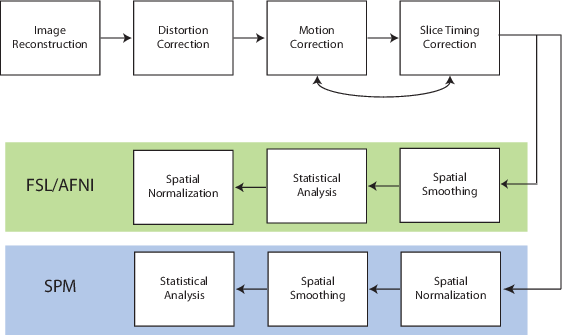

In [15]:
WImage(filename=os.path.join(config.orig_figuredir,'Figure_1_4.pdf'))